In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data

In [96]:
cb = pd.read_csv('questionnaire_codebook.csv')
    
q2 = pd.read_csv('tidy_data_questionnaire_section_2.csv')
q3 = pd.read_csv('tidy_data_questionnaire_section_3.csv')
q4 = pd.read_csv('tidy_data_questionnaire_section_4.csv')
q5 = pd.read_csv('tidy_data_questionnaire_section_5.csv')
q7 = pd.read_csv('tidy_data_questionnaire_section_7.csv')
q8 = pd.read_csv('tidy_data_questionnaire_section_8.csv')

## Initial Exploration
### Identify what information each dataframe provides

In [97]:
#Plot characteristics
#Do NaN values in 'no_of_toilets' field imply zero toilets? As minimum non-NaN value is 1.
q2.head()

,id,respondent,sex,plot_months,type_of_property,no_of_hhs,no_of_ppl,s2q9a54,type_of_toilet,no_of_toilets,add_toilets,water_source,water_source_other,latitude,longitude,accuracy,altitude
0,id_00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_00002,landlord,female,1.0,residential,4.0,25.0,NaN,pit_latrine_lined,1.0,NaN,other_specify,Lusaka water connected tap,NaN,NaN,NaN,NaN
2,id_00003,tenant,male,48.0,residential,4.0,22.0,NaN,NaN,NaN,yes_4,individual_connection,NaN,NaN,NaN,NaN,NaN
3,id_00004,tenant,female,192.0,residential,13.0,38.0,NaN,pit_latrine_lined,1.0,NaN,water_kiosk,NaN,-15.431633,28.245173,3.9,1289.8
4,id_00005,landlord,female,5.0,residential,4.0,14.0,NaN,pit_latrine_lined,1.0,yes_2,water_kiosk,NaN,-15.430095,28.242203,3.9,1268.9


In [98]:
#calculating average people per household
total_ppl = q2['no_of_ppl'].sum()
total_hh = q2['no_of_hhs'].sum()
avg_ppl_hh = total_ppl/total_hh

print('Total people: {}'.format(total_ppl))
print('Total households: {}'.format(total_hh))
print('Avg. People per household: {}'.format(avg_ppl_hh))

Total people: 215097.0
Total households: 53884.0
Avg. People per household: 3.991852869126271


In [99]:
#Toilet user profile
q3.head()

,id,toilet_user,no_of_toilet_user,solid_waste_disp
0,id_00001,NaN,NaN,NaN
1,id_00002,children_male,4.0,bin_collected_CBEs
2,id_00002,children_female,13.0,bin_collected_CBEs
3,id_00002,adults_male,3.0,bin_collected_CBEs
4,id_00002,adults_female,4.0,bin_collected_CBEs


In [100]:
#Toilet Maintenance
#id is unique in this df. But which toilet do each of the fields apply to??
q4.head()

,id,age_toilet_1,age_toilet_2,age_toilet_3,when_toilet_full,ever_emptied,when_last_emptied,know_emptying_service,who_emptied,how_often_emptied_mo,how_often_emptied_other,when_next_full_mo,why_never_emptied
0,id_00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_00002,36.0,NaN,NaN,empty_and_reuse,yes,between_five_and_six_months,friend_familiy_neighbor,other,NaN,NaN,6.0,NaN
2,id_00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_00004,24.0,NaN,NaN,bury_and_build_new,no,NaN,NaN,NaN,NaN,NaN,7.0,never_been_full
4,id_00005,60.0,NaN,NaN,empty_and_reuse,no,NaN,NaN,NaN,NaN,NaN,NaN,never_been_full


In [101]:
#Characteristics of first toilet
q5.head()

,id,roof_material,slab_material,slab_material_other,user_interface,user_interface_other,containment,containment_other,fill_level,emptying_feasible,overflow_flooding,vacuum_tanker_access,light_truck_access,push_cart_access
0,id_00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_00002,iron_sheets,concrete,NaN,dry_toilet_squat,NaN,pit_latrine,NaN,almost_full,yes,no,yes,yes,yes
2,id_00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,id_00004,no_roof,concrete,NaN,dry_toilet_squat,NaN,pit_latrine,NaN,almost_full,yes,no,yes,yes,yes
4,id_00005,asbestos_sheets,concrete,NaN,dry_toilet_squat,NaN,pit_latrine,NaN,almost_empty,no,no,yes,yes,yes


In [102]:
#Characteristics of second toilet
q7.head()

,id,roof_material_toilet_2,slab_material_toilet_2,slab_material_other_toilet_2,user_interface_toilet_2,user_interface_other_toilet_2,containment_toilet_2,containment_other_toilet_2,fill_level_toilet_2,emptying_feasible_toilet_2,overflow_flooding_toilet_2,vacuum_tanker_access_toilet_2,light_truck_access_toilet_2,push_cart_access_toilet_2
0,id_00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#Characteristics of third toilet
q8.head()

,id,roof_material_toilet_3,slab_material_toilet_3,slab_material_other_toilet_3,user_interface_toilet_3,user_interface_other_toilet_3,containment_toilet_3,containment_other_toilet_3,fill_level_toilet_3,emptying_feasible_toilet_3,overflow_flooding_toilet_3,vacuum_tanker_access_toilet_3,light_truck_access_toilet_3,push_cart_access_toilet_3
0,id_00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id_00002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_00003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_00004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id_00005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Duplicates in ID column

In [104]:
#Which IDs (plots) are duplicated - looks like majority are due to type of toilet changing i.e from used to disused
q2_id_dups = q2[q2['id'].duplicated(keep=False)]
q2_id_dups.head(6)

,id,respondent,sex,plot_months,type_of_property,no_of_hhs,no_of_ppl,s2q9a54,type_of_toilet,no_of_toilets,add_toilets,water_source,water_source_other,latitude,longitude,accuracy,altitude
6,id_00007,NaN,NaN,NaN,residential,7.0,6.0,NaN,pit_latrine_lined,1.0,yes_1,private,NaN,NaN,NaN,NaN,NaN
7,id_00007,NaN,NaN,NaN,residential,7.0,6.0,NaN,disused_buried,1.0,yes_1,private,NaN,NaN,NaN,NaN,NaN
18,id_00018,landlord,female,12.0,residential,13.0,31.0,NaN,pit_latrine_lined,1.0,NaN,water_kiosk,NaN,NaN,NaN,NaN,NaN
19,id_00018,landlord,female,12.0,residential,13.0,31.0,NaN,disused_buried,1.0,NaN,water_kiosk,NaN,NaN,NaN,NaN,NaN
22,id_00021,landlord,male,12.0,residential,5.0,25.0,NaN,pit_latrine_lined,1.0,yes_1,private,NaN,-15.430098,28.241942,4.9,1289.4
23,id_00021,landlord,male,12.0,residential,5.0,25.0,NaN,disused_buried,1.0,yes_1,private,NaN,-15.430098,28.241942,4.9,1289.4


### Location Plots

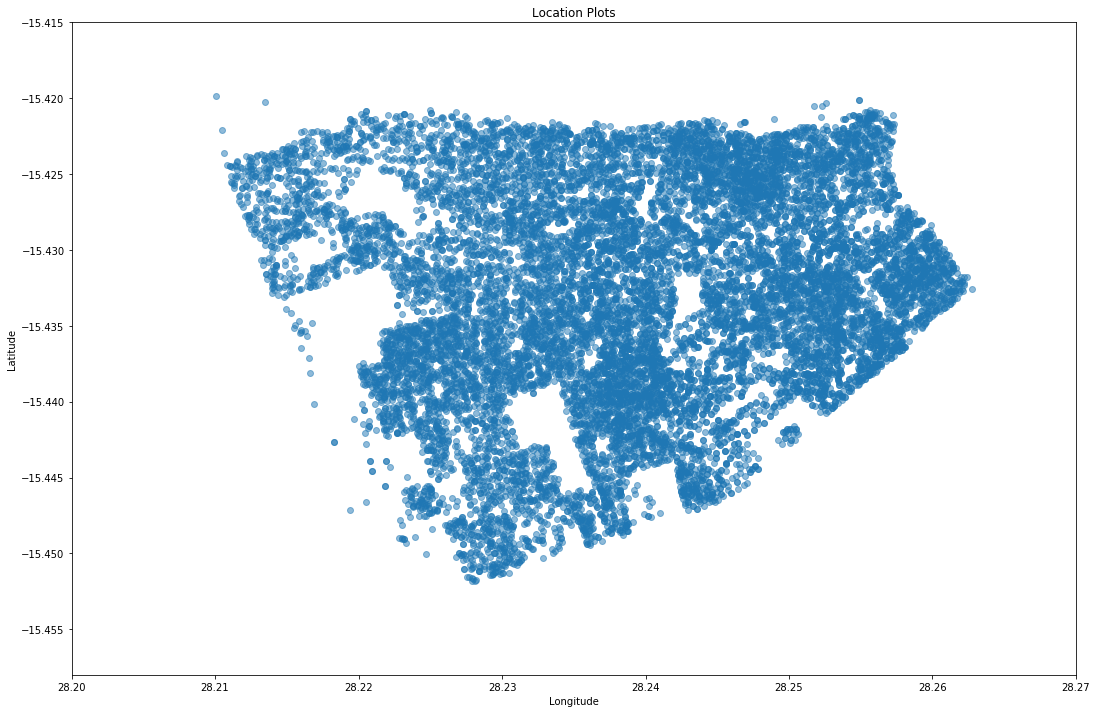

In [137]:
#drop plot id_10380 as its lat/long is way outside our geographic range
i = q2[(q2['id'] == 'id_10380')].index
q2 = q2.drop(i)

#Initial location of all plots with non-null lat/lons
plt.figure(figsize=(18,12))
plt.scatter(x=q2['longitude'],y=q2['latitude'],alpha = 0.5)
axes = plt.gca()
axes.set_title('Location Plots')
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_xlim([28.20,28.27])
axes.set_ylim([-15.458,-15.415])

plt.show()

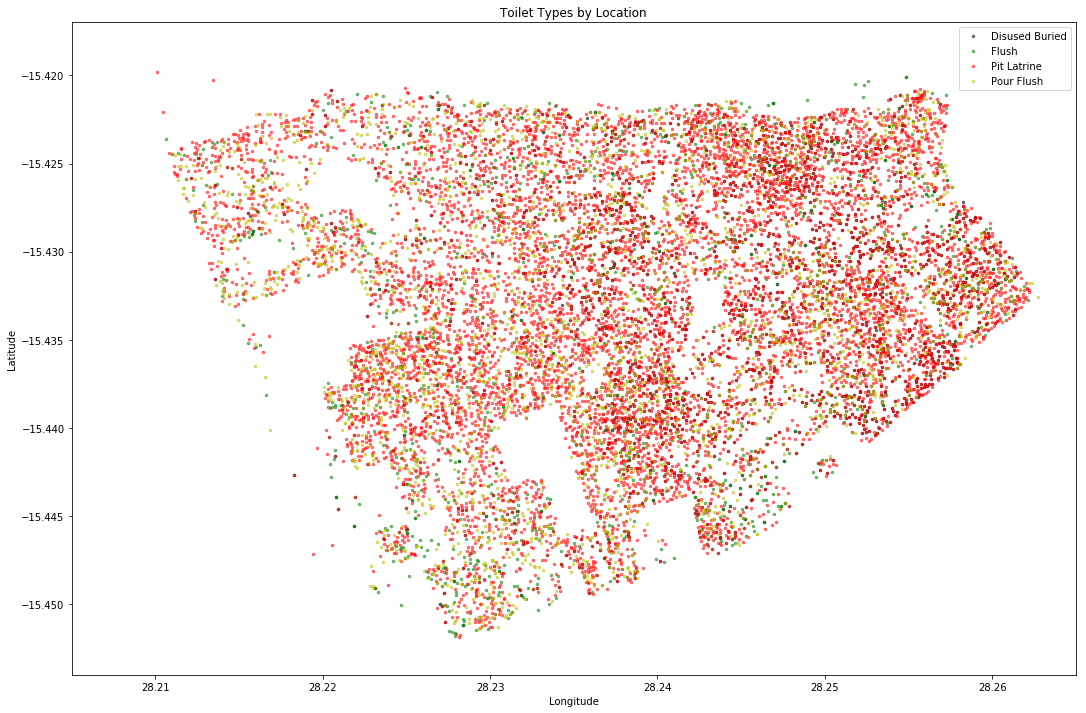

In [152]:
#Location of different types of toilet - can have multiple toilets per plot, so a bit of a proxy
new_toilet_cats = {'UDDT':'Pit Latrine','VIP':'Pit Latrine','disused_buried':'Disused Buried',
                   'flush_inside':'Flush','flush_outside':'Flush','pit_latrine_lined':'Pit Latrine',
                   'pit_latrine_unlined':'Pit Latrine','pour_flush_inside':'Pour Flush','pour_flush_outside':'Pour Flush'}

q2['new_type_of_toilet'] = q2['type_of_toilet'].map(new_toilet_cats)

groups = q2.groupby('new_type_of_toilet')
colours = ['k','g','r','y']

fig, ax = plt.subplots(figsize=(18,12))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
i=0
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=2.5, label=name, alpha = 0.5, c=colours[i])
    i = i + 1
ax.legend()
axes = plt.gca()
axes.set_title('Toilet Types by Location')
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_xlim([28.205,28.265])
axes.set_ylim([-15.454,-15.417])

plt.show()

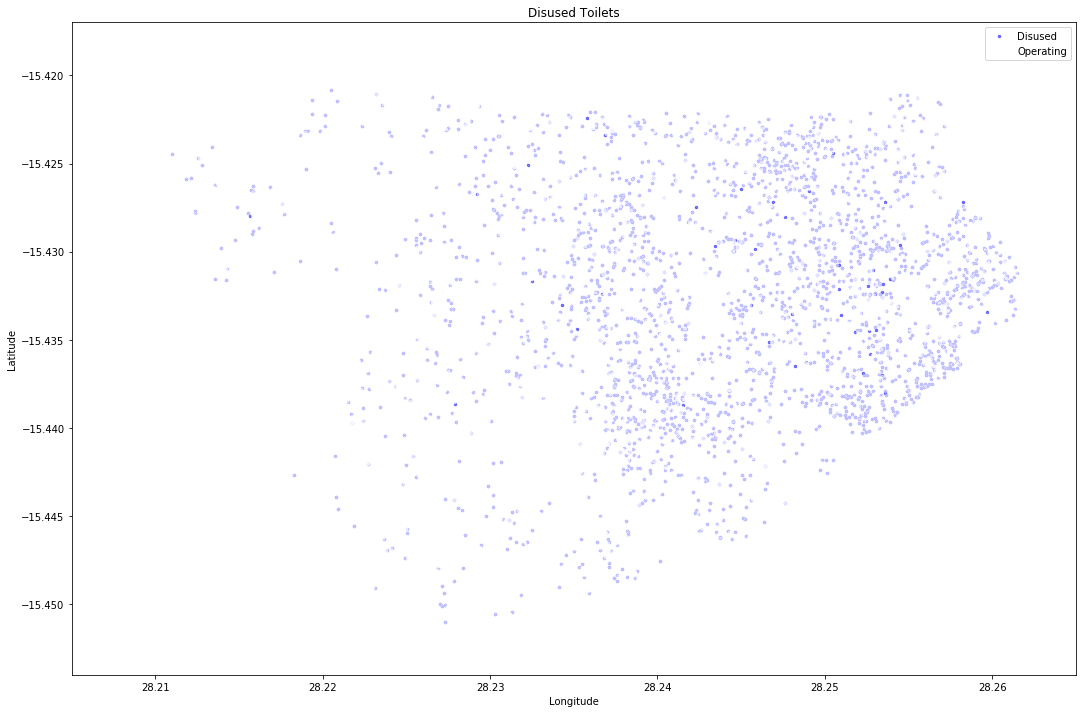

In [151]:
#Location of active non-closed toilets - can have multiple toilets per plot, so a bit of a proxy
active_toilet_cats = {'UDDT':'Operating','VIP':'Operating','disused_buried':'Disused',
                   'flush_inside':'Operating','flush_outside':'Operating','pit_latrine_lined':'Operating',
                   'pit_latrine_unlined':'Operating','pour_flush_inside':'Operating','pour_flush_outside':'Operating'}

q2['active_toilet'] = q2['type_of_toilet'].map(active_toilet_cats)
groups = q2.groupby('active_toilet')
colours = ['b','w']

fig, ax = plt.subplots(figsize=(18,12))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
i = 0
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=2.5, label=name, alpha = 0.5, c=colours[i])
    i = i + 1
ax.legend()
axes = plt.gca()
axes.set_title('Disused Toilets')
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_xlim([28.205,28.265])
axes.set_ylim([-15.454,-15.417])

plt.show()

### Import & Plot transformed plot risk data set

In [144]:
#Cleansing routine in SQL script: Gather SQL Script

#Risk methodology as follows: 
#Toilet risk: Pit latrine (3), Pour Flush (2), Flush (1), Disused (0)
#User Number Risk: >20 users (3), 10-20 users (2), <10 users (1)
#Assign scores to each plot based on above, then multiply toilet risk by user number risk to obtain compound score.
#Compound score: >6 (Red), >3-6 (Amber), 1-3 (Green), 0 (Disused toilet only)

risk = pd.read_csv('Plot_Risk_Status.csv')
risk.head()

,id,compound_risk,latitude,longitude,RAG_Status
0,id_00001,NaN,NaN,NaN,NaN
1,id_00002,9.0,NaN,NaN,Red
2,id_00003,NaN,NaN,NaN,NaN
3,id_00004,9.0,-15.431633,28.245173,Red
4,id_00005,6.0,-15.430095,28.242203,Amber


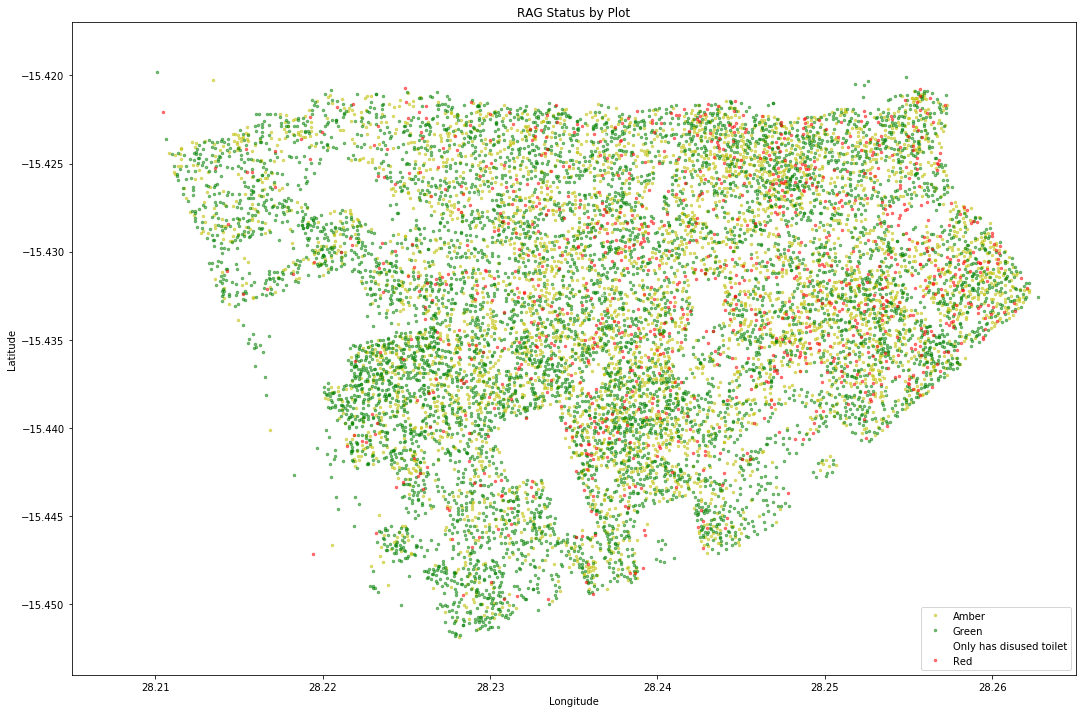

In [155]:
#Plots risk rating
groups = risk.groupby('RAG_Status')
colours = ['y','g','w','r']

fig, ax = plt.subplots(figsize=(18,12))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
i = 0
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=2.5, label=name, alpha = 0.5, c=colours[i])
    i = i + 1
ax.legend()
axes = plt.gca()
axes.set_title('RAG Status by Plot')
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_xlim([28.205,28.265])
axes.set_ylim([-15.454,-15.417])

plt.show()